In [1]:
import sys
import os
from random import sample

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import v2 as transforms

sys.path.append(os.path.join(os.getcwd(), "project"))

from project.emotion_recognition.constants import DEFAULT_DS_ROOT, IMG_SIZE, CLASSES
from project.emotion_recognition.dataset import FER2013

In [2]:
transform = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize(IMG_SIZE, antialias=True),
        transforms.ToImage(),
        transforms.ToDtype(torch.float, scale=True),
    ]
)
dataset = FER2013(root=DEFAULT_DS_ROOT, split="train", transform=transform)

### Visualize class distribution


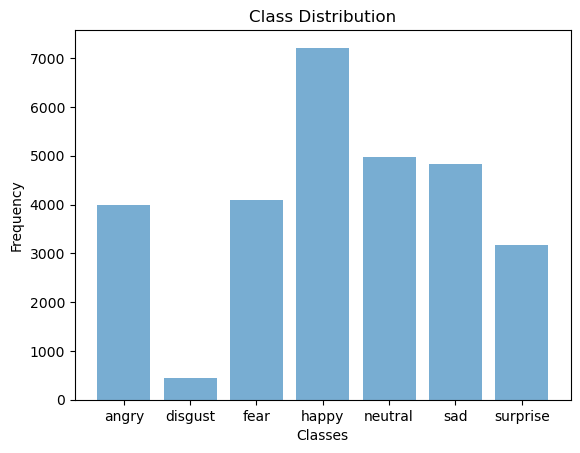

In [6]:
frequencies = np.zeros(len(CLASSES))

for x, y in dataset:
    frequencies[y] += 1


# Create a histogram of the class frequencies
plt.bar(range(len(CLASSES)), frequencies, tick_label=CLASSES, alpha=0.6)

# Add labels and title
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution")

# Show the plot
plt.show()

### Visualize histogram of transformed pixel intensities (Check if standard normal distribution is roughly followed)


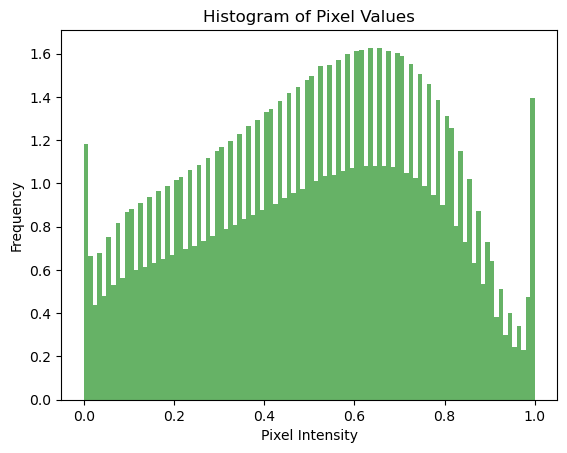

In [7]:
num_samples = 50000

# Ensure that the number of samples does not exceed the dataset size
num_samples = min(num_samples, len(dataset))

# Randomly sample indices
sample_indices = sample(range(len(dataset)), num_samples)

# Collect sampled images
sampled_images = torch.stack([dataset[i][0] for i in sample_indices])

# Flatten the images to get a 1D array of pixel values
pixel_values = sampled_images.flatten().numpy()

# Create a histogram of the pixel values
plt.hist(pixel_values, bins=100, density=True, alpha=0.6, color="g")

# Add labels and title
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values")

# Show the plot
plt.show()

# As seen from the unimodal pixel distribution above, it's safe to assume a standard normality
